In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
diamond=pd.read_csv('diamonds.csv')

In [3]:
diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamond.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [5]:
def uniques(feature):
    un=diamond[feature].unique()
    unno=diamond[feature].nunique()
    return (un,unno)

In [6]:
uniques('cut')

(array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object), 5)

In [7]:
uniques('color')

(array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object), 7)

In [8]:
uniques('clarity')

(array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
       dtype=object), 8)

In [9]:
del diamond['Unnamed: 0']

In [10]:
diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [11]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [12]:
#there dimensions such as zero for length,width,depth.

In [13]:
z=sum(diamond["x"]==0)
print("no of unreliable length:",z)
print("no of unrealaible width:{}".format(sum(diamond["y"]==0)))
print("no of unrealaible depth:{}".format(sum(diamond["z"]==0)))

no of unreliable length: 8
no of unrealaible width:7
no of unrealaible depth:20


In [14]:
diamond[['x','y','z']] = diamond[['x','y','z']].replace(0,np.NaN)

In [15]:
diamond.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

In [16]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53932 non-null float64
y          53933 non-null float64
z          53920 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [17]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])


In [18]:
missing_percentage(diamond)

,Total,Percent
z,20,0.04
x,8,0.01
y,7,0.01
price,0,0.00
table,0,0.00
depth,0,0.00
clarity,0,0.00
color,0,0.00
cut,0,0.00
carat,0,0.00


In [19]:
diamond.dropna(inplace=True)

In [20]:
diamond.shape

(53920, 10)

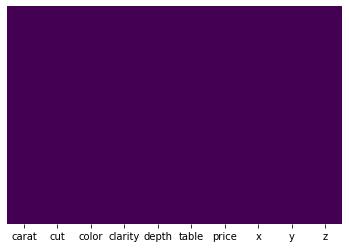

In [21]:
sns.heatmap(diamond.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
#we have a cleaned dataset.

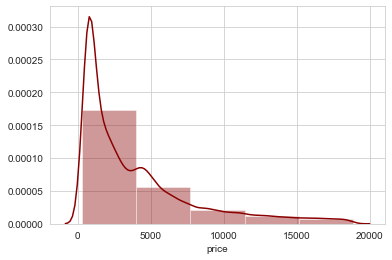

In [23]:
sns.set_style('whitegrid')
sns.distplot(diamond["price"],color='darkred',bins=5)

<Figure size 720x432 with 0 Axes>

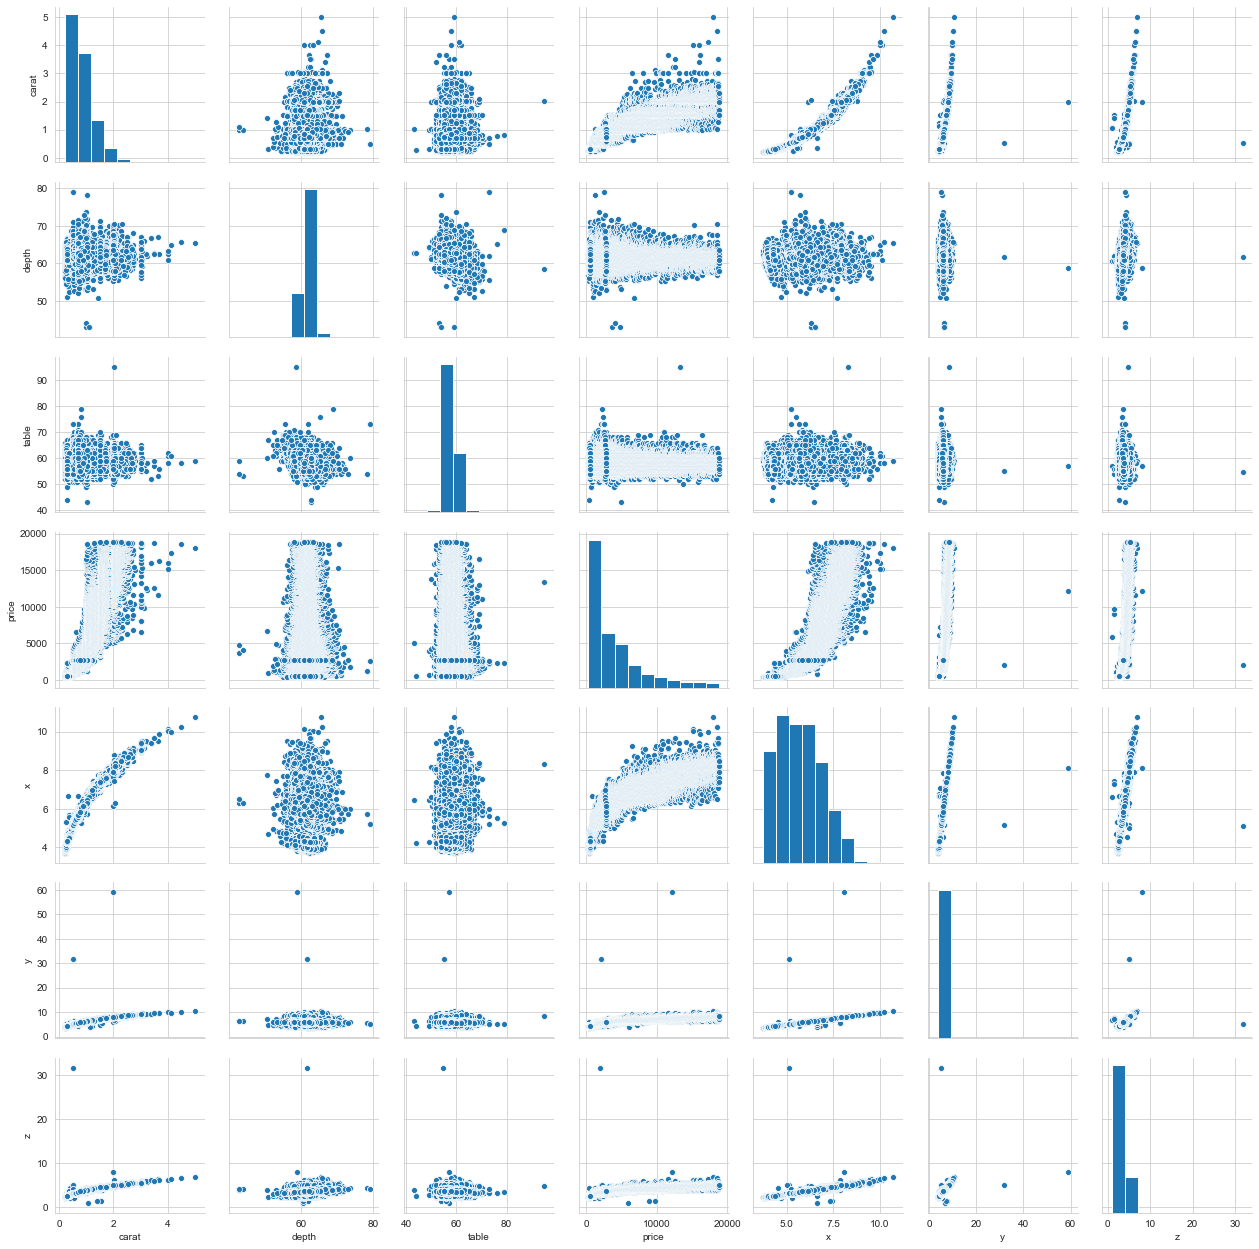

In [24]:
plt.figure(figsize=(10,6))
sns.pairplot(diamond)

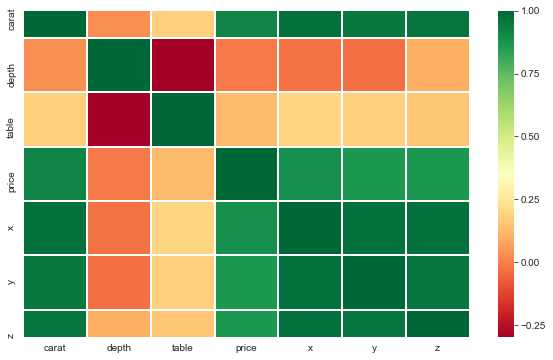

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(diamond.corr(),linewidths=1,cmap='RdYlGn')

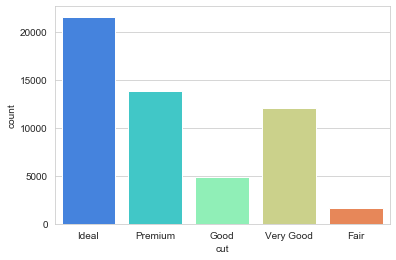

In [26]:
sns.countplot(x='cut',data=diamond,palette='rainbow')

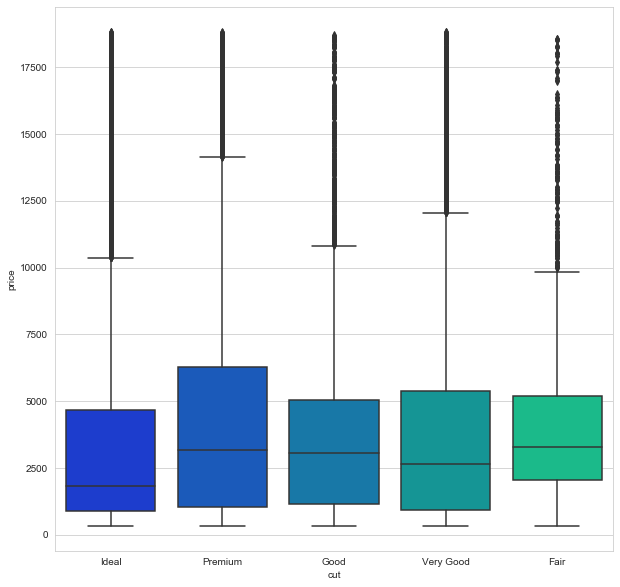

In [27]:
plt.figure(figsize=(10,10))
sns.boxplot(x='cut',y='price',data=diamond,palette='winter')

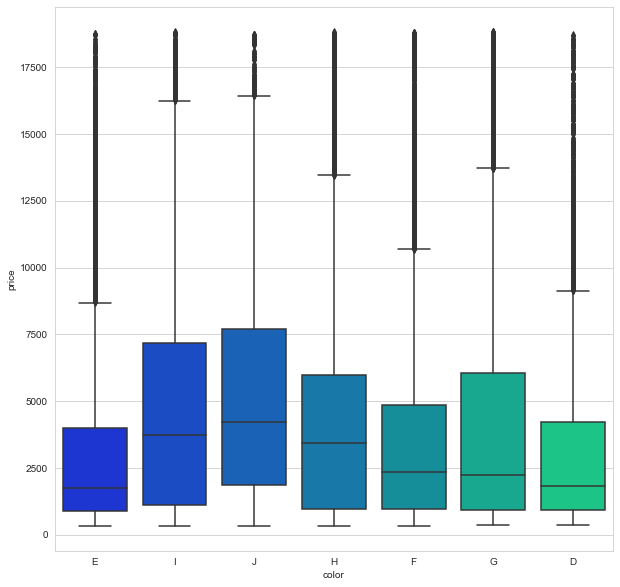

In [28]:
plt.figure(figsize=(10,10))
sns.boxplot(x='color',y='price',data=diamond,palette='winter')

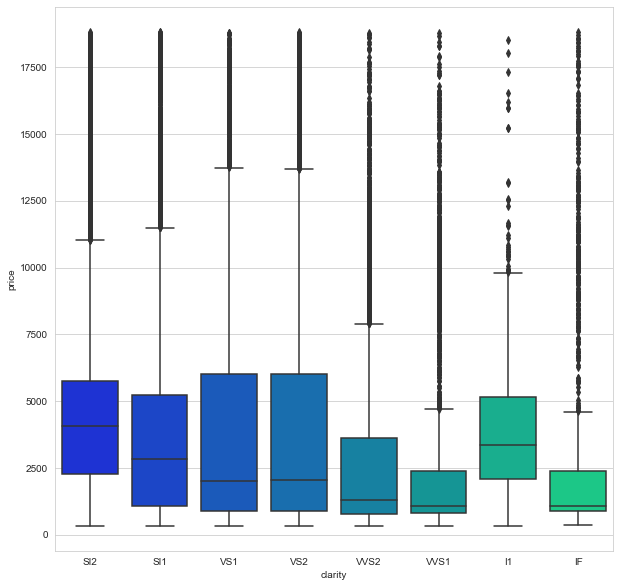

In [29]:
plt.figure(figsize=(10,10))
sns.boxplot(x='clarity',y='price',data=diamond,palette='winter')

In [30]:
#encode the categorical data.

How to Convert Categorical Data to Numerical Data?
This involves two steps:

1. Integer Encoding
As a first step, each unique category value is assigned an integer value.

For example, “red” is 1, “green” is 2, and “blue” is 3.

This is called a label encoding or an integer encoding and is easily reversible.

For some variables, this may be enough.

The integer values have a natural ordered relationship between each other and machine learning algorithms may be able to understand and harness this relationship.

For example, ordinal variables like the “place” example above would be a good example where a label encoding would be sufficient.

2. One-Hot Encoding
For categorical variables where no such ordinal relationship exists, the integer encoding is not enough.

In fact, using this encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).

In this case, a one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

In the “color” variable example, there are 3 categories and therefore 3 binary variables are needed. A “1” value is placed in the binary variable for the color and “0” values for the other colors.

For further reference : https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

In [31]:
encoded=pd.get_dummies(diamond)

In [32]:
encoded

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [33]:
end=encoded.drop(['carat','depth','table',
       'price','x', 'y', 'z'],axis=1)

In [34]:
diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [35]:
diamond_data=pd.concat([diamond,end],axis=1).drop(['cut', 'color', 'clarity'],axis=1)

In [36]:
diamond_data

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


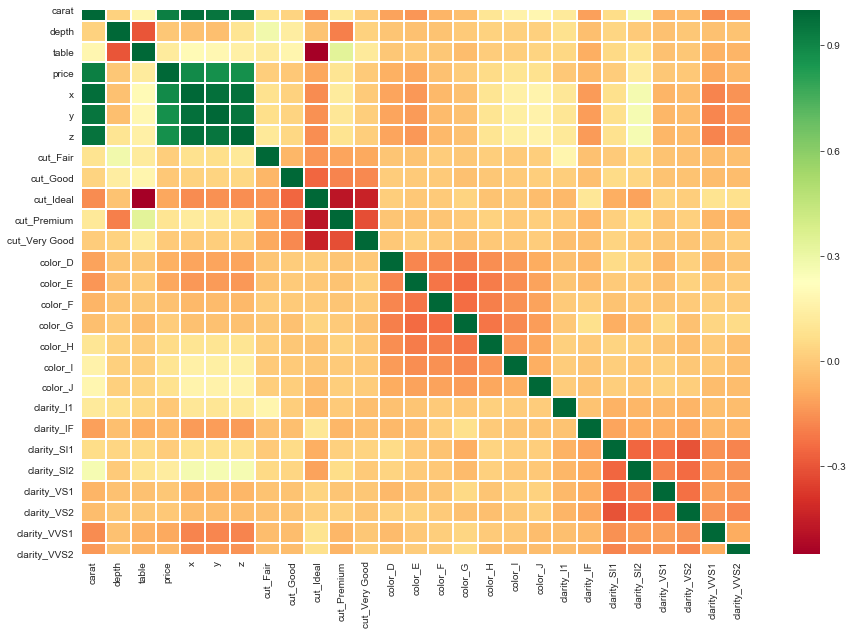

In [37]:
plt.figure(figsize=(15,10))
sns.heatmap(diamond_data.corr(),linewidths=1,cmap='RdYlGn')

In [38]:
#model traiing and prediction

In [39]:
x = diamond_data.drop(['price'],axis=1)
y = diamond_data['price']

In [40]:
x.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
 X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=101)

In [43]:
X_train.shape

(36126, 26)

In [44]:
 X_test.shape

(17794, 26)

In [45]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
predictions = lm.predict(X_test)

In [47]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
carat,11304.259638
depth,-66.912101
table,-29.556689
x,-1032.446184
y,14.869121
z,-75.814049
cut_Fair,-536.797067
cut_Good,-8.872698
cut_Ideal,240.721744
cut_Premium,180.893879


In [48]:
# 1 unit increase in carat results in increase of price by 11304.259638

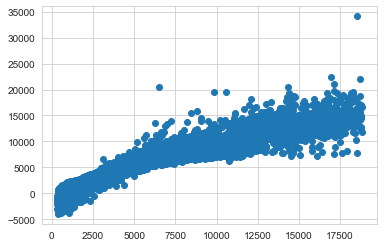

In [49]:
plt.scatter(y_test,predictions)

In [50]:
from sklearn import metrics

In [51]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 735.4270688433922
MSE: 1239779.000210429
RMSE: 1113.4536363093118


In [52]:
print("accuracy: ",(lm.score(X_test,y_test)))

accuracy:  0.9219201968274957


Thank you!!